In [41]:
import numpy as np

from multiprocessing import Pool
import multiprocessing


#### 1.  Создайте матрицу 3x3 со значениями от 0 до 8

In [5]:
a = np.arange(0,9)
a.reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

#### 2. Необходимо найти все целые числа от 1 до 400 000, для которых sin от этого числа будет иметь не менее 9 одинаковых цифр (например, sin(139198)=0.30763333543133703; sin(139198)=0.30763333543133703 т.е. имеет 9 троек). Ответ представляет собой список пар (целое число, значение синуса для него), для которых значение синуса удовлетворяет условию. Решение этой задачи распараллелить, используя multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи.


In [56]:
%%writefile count_sin.py
from collections import Counter
import math


def count_sin(x):
    myDict = Counter(str(math.sin(x)))
    if max(myDict.values()) >= 9:
        return x , math.sin(x)
    return None

Overwriting count_sin.py


In [62]:
%%time
from multiprocessing import Pool
from count_sin import count_sin

if __name__ == '__main__':
    with Pool() as pool:
        result = pool.map(count_sin, range(1, 400_001))

result = [res for res in result if res != None]
result

CPU times: user 70.4 ms, sys: 110 ms, total: 181 ms
Wall time: 331 ms


[(1797, 0.009002025051800673),
 (3775, -0.9299841096999939),
 (7089, 0.9999926930119999),
 (10639, 0.9999937999413936),
 (24074, 0.024502006300003643),
 (25904, -0.9999975242999319),
 (31249, 0.4097000800060077),
 (36693, -0.7188828881448883),
 (38968, -0.31007805001001504),
 (46617, 0.8881880887188651),
 (47105, -0.040237060001058055),
 (47306, -0.10200005360030799),
 (48979, 0.9999999646773939),
 (50399, 0.9999999894564097),
 (50754, -0.9999999933794586),
 (51109, 0.9999999963938254),
 (51464, -0.9999999984995102),
 (51819, 0.999999999696513),
 (52174, -0.9999999999848337),
 (52529, 0.9999999993644724),
 (52884, -0.999999997835429),
 (53239, 0.9999999953977037),
 (53594, -0.9999999920512962),
 (54609, 0.9649091969997949),
 (54659, 0.9999999765599817),
 (55724, -0.9999999528905291),
 (58564, -0.9999998497899818),
 (60694, -0.999999734299931),
 (63525, 0.9107300260000201),
 (66374, -0.9999992663984799),
 (67490, 0.7412811211116511),
 (78444, -0.9999974997289492),
 (97284, 0.99170294159

In [70]:
%%time
from collections import Counter
import math

def count_sin(x):
    myDict = Counter(str(math.sin(x)))
    if max(myDict.values()) >= 9:
        return x , math.sin(x)
    return None

result = []
for i in range(1, 400_001):
    res = count_sin(i)
    if res != None:
        result.append(res)
result
    

CPU times: user 1.16 s, sys: 6.27 ms, total: 1.17 s
Wall time: 1.17 s


[(1797, 0.009002025051800673),
 (3775, -0.9299841096999939),
 (7089, 0.9999926930119999),
 (10639, 0.9999937999413936),
 (24074, 0.024502006300003643),
 (25904, -0.9999975242999319),
 (31249, 0.4097000800060077),
 (36693, -0.7188828881448883),
 (38968, -0.31007805001001504),
 (46617, 0.8881880887188651),
 (47105, -0.040237060001058055),
 (47306, -0.10200005360030799),
 (48979, 0.9999999646773939),
 (50399, 0.9999999894564097),
 (50754, -0.9999999933794586),
 (51109, 0.9999999963938254),
 (51464, -0.9999999984995102),
 (51819, 0.999999999696513),
 (52174, -0.9999999999848337),
 (52529, 0.9999999993644724),
 (52884, -0.999999997835429),
 (53239, 0.9999999953977037),
 (53594, -0.9999999920512962),
 (54609, 0.9649091969997949),
 (54659, 0.9999999765599817),
 (55724, -0.9999999528905291),
 (58564, -0.9999998497899818),
 (60694, -0.999999734299931),
 (63525, 0.9107300260000201),
 (66374, -0.9999992663984799),
 (67490, 0.7412811211116511),
 (78444, -0.9999974997289492),
 (97284, 0.99170294159

Датасет: addres-book-q.xml 
 #### 3. По данным из файла addres-book-q.xml сформировать словарь, в котором по должности можно получить список людей с данной должностью и для каждого человека по соответствующему ключу можно получить имя, компанию и список всех доступных телефонов. Сохранить данную структуру данных в файл формата json и прочитать ее, показав идентичность структуры данных после сохранения/загрузки.


In [156]:
import xml.etree.ElementTree as ET
import json
from bs4 import BeautifulSoup

In [185]:
tree = ET.parse('data/addres-book-q.xml')
root = tree.getroot()

people_by_job = {}
all_by_people = {}

for add in root.findall('country/address'):
    job = add.find('position').text
    people_by_job.setdefault(job, []).append(add.find('name').text)
    
print(people_by_job)

for add in root.findall('country/address'):
    person_id = add.attrib['id']
    phones = add.findall('phones/phone')
    phone_numbers = [phone.text for phone in phones]

    all_by_people.setdefault(person_id, []).append([add.find('name').text, add.find('company').text, phone_numbers])

print(all_by_people)

{'Presidente': ['Aicha Barki'], 'Directeur General': ['Francisco Domingos'], 'Directrice Nationale': ['Maria Luisa'], 'Chef': ['Abraao Chanda'], 'Executive Director': ['Beatriz Busaniche', 'Francesca Beddie'], 'Secretary': ['Graham John Smith']}
{'1': [['Aicha Barki', "Association Algerienne d'Alphabetisation Iqraa", ['+ (213) 6150 4015', '+ (213) 2173 5247']]], '2': [['Francisco Domingos', 'Institut National de Education des Adultes', ['+ (244-2) 325 023', '+ (244-2) 325 023']]], '3': [['Maria Luisa', 'Institut National de Education des Adultes', ['+ (244) 4232 2836']]], '4': [['Abraao Chanda', 'Institut National de Education des Adultes', ['+ (244-2) 325 023', '+ (244-2) 325 023']]], '5': [['Beatriz Busaniche', 'Universidad de Buenos Aires', ['+ (54-11) 4784 1159']]], '6': [['Francesca Beddie', 'Adult Learning Australia', ['+ (61-2) 6274 9500', '+ (61-2) 6274 9513']]], '7': [['Graham John Smith', 'Disability Australia Ltd', ['+ (61-3) 9807 4702']]]}


In [187]:
with open('address_book.json', 'w') as f:
    json.dump(people_by_job, f)

with open('address_book.json', 'r') as f:
    loaded_data = json.load(f)

print(people_by_job == loaded_data)

True


In [142]:
ET.dump(tree)

<address_book>
<country name="algeria">
<address id="1">
	<gender>m</gender>
	<name>Aicha Barki</name>
	<email>aiqraa.asso@caramail.com</email>
	<position>Presidente</position>
	<company>Association Algerienne d'Alphabetisation Iqraa</company>
	<phones>
		<phone type="work">+ (213) 6150 4015</phone>
		<phone type="personal">+ (213) 2173 5247</phone>
	</phones>	
</address>
</country>
<country name="angola">
<address id="2">
	<gender>m</gender>
	<name>Francisco Domingos</name>
	<email>frandomingos@hotmail.com</email>
	<position>Directeur General</position>
	<company>Institut National de Education des Adultes</company>
	<phones>
		<phone type="work">+ (244-2) 325 023</phone>
		<phone type="personal">+ (244-2) 325 023</phone>
	</phones>	
</address>
<address id="3">
	<gender>f</gender>
	<name>Maria Luisa</name>
	<email>luisagrilo@ebonet.net</email>
	<position>Directrice Nationale</position>
	<company>Institut National de Education des Adultes</company>
	<phones>
		<phone type="personal">+ (

Датасет: all_k.zip
#### 4. Подсчитать, сколько раз в текстовых файлах, лежащих в all_k.zip, встречаются предложения трех видов: вопросительные (в окончании имеют вопросительный знак), побудительные (в окончании имеют восклицательный знак и не имеют вопросительного) и повествовательные (в окончании имеют точку или троеточие, при этом нужно исключить учет точек, встречающихся в сокращениях, таких как ""т.к."").
Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).


In [203]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kirillanpilov/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [218]:
import dask.bag as db
import os
import re
import nltk


all_k = "data/all_k"

all_k = db.read_text(os.path.join(all_k,"*.TXT"), encoding = 'windows-1251')
all_k = all_k.map(lambda x: x.strip())
all_k = all_k.filter(lambda x: x != '')
sentences = all_k.map(lambda x: nltk.sent_tokenize(x))
sentences = sentences.flatten()


question_count = sentences.map(lambda x: x.endswith('?'))
imperative_count = sentences.map(lambda x: x.endswith('!') and not x.endswith('?!'))
declarative_count =sentences.map(lambda x: x.endswith('.') or x.endswith('...'))  




In [219]:
declarative_count.sum().compute() , imperative_count.sum().compute(), question_count.sum().compute()

(3745892, 239662, 437129)

Датасет: wine.csv.zip
#### 5.
 #### 1. Как часто каждая страна появляется в датасете wine.csv.zip? Создайте pd.Series сопоставляющую страны количеству отзывов о винах из этой страны. 
####  2. Определите среднюю оценку рейтинга для каждого ревьюера (используйте 'taster_name' ,'points')


In [221]:
import pandas as pd

In [226]:
df_wine = pd.read_csv('data/winemag-data-130k-v2.csv')
df_wine = df_wine.drop('Unnamed: 0', axis = 1)
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [227]:
df_wine.groupby('country')['title'].count().sort_values()

country
China                         1
Slovakia                      1
Egypt                         1
Armenia                       2
Bosnia and Herzegovina        2
Luxembourg                    6
Switzerland                   7
India                         9
Cyprus                       11
Czech Republic               12
Serbia                       12
Macedonia                    12
Ukraine                      14
Peru                         16
Morocco                      28
Lebanon                      35
Brazil                       52
Moldova                      59
Mexico                       70
Croatia                      73
England                      74
Georgia                      86
Slovenia                     87
Turkey                       90
Uruguay                     109
Romania                     120
Bulgaria                    141
Hungary                     146
Canada                      257
Greece                      466
Israel                      505


In [228]:
df_wine.groupby('taster_name')['points'].mean().sort_values()

taster_name
Alexander Peartree    85.855422
Carrie Dykes          86.395683
Susan Kostrzewa       86.609217
Fiona Adams           86.888889
Michael Schachner     86.907493
Lauren Buzzeo         87.739510
Christina Pickard     87.833333
Jeff Jenssen          88.319756
Anna Lee C. Iijima    88.415629
Joe Czerwinski        88.536235
Jim Gordon            88.626287
Roger Voss            88.708003
Sean P. Sullivan      88.755739
Kerin O’Keefe         88.867947
Paul Gregutt          89.082564
Mike DeSimone         89.101167
Virginie Boone        89.213379
Matt Kettmann         90.008686
Anne Krebiehl MW      90.562551
Name: points, dtype: float64

Датасет: minutes_n_ingredients_full.hdf5
 #### 6. Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и вычислите среднее значение по каждому столбцу, кроме первого.


In [42]:
import h5py
import dask.array as da

filename = 'minutes_n_ingredients_full.hdf5'
with h5py.File(filename, 'r') as f:
     dataset = f['recipe']
     dask_array = da.from_array(dataset[:], chunks=(100_000, 3))

dask_array[:,1:].mean(axis = 0).compute()
    


array([1004.20805176,    5.4198008 ])

Датасет: titanic.csv
 #### 7. 
 ##### 1. Сколько мужчин / женщин находилось на борту? 
 ##### 2. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?


In [45]:
import pandas as pd 
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df_titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [49]:
df_titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [51]:
df_titanic.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

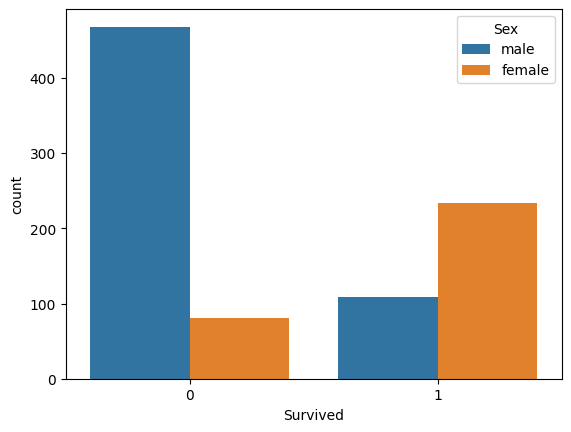

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived', data=df_titanic, hue='Sex')

Датасет: -
#### 8. Как найти общие значения между двумя массивами?


In [56]:
import numpy as np

array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([4, 5, 6, 7, 8])

common_values = np.intersect1d(array1, array2)

print(common_values)


[4 5]



Датасет: -
#### 9.Создать двумерный массив 30 на 4, содержащий случайные целые числа от 0 до 100. Интерпретируя массив как 30 векторов из 4х компонент, вернуть массив 5 на 4, состоящий из векторов с наибольшей длиной (евклидовой нормой).Решить задачу средствами numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек.


In [60]:
array = np.random.randint(0, 100, size=(30, 4))
norms = np.linalg.norm(array, axis=1)
max_norm_indices = np.argsort(norms)[-5:]
result = array[max_norm_indices]

print(result)

[[63 95 52 63]
 [99 27 81 55]
 [89 92 47 61]
 [90 55 67 86]
 [86 93 84 53]]



Датасет: titanic.csv
#### 10. 
1. Верно ли, что средний возраст выживших людей выше, чем у не выживших пассажиров? 
2. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?


In [62]:
import pandas as pd 
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df_titanic.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [64]:
df_titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Датасет: titanic.csv
#### 11.
 1. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах? 
 2. Найдите самое популярное имя среди пассажиров Титаника мужского пола.


In [66]:
import pandas as pd 
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df_titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [87]:
df_titanic[df_titanic['Sex'] == 'male']['Name'].apply(lambda x: x.split(',')[0]).value_counts().idxmax()

'Panula'

Датасет: minutes_n_ingredients_full.hdf5
 #### 11. Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и выберите рецепты, время выполнения которых меньше медианного значения.

In [103]:
import h5py
import dask.array as da

filename = 'minutes_n_ingredients_full.hdf5'
with h5py.File(filename, 'r') as f:
     dataset = f['recipe']
     dask_array = da.from_array(dataset[:], chunks=(100_000, 3))
    
mask = dask_array[:, 1] < dask_array[:, 1].mean()
result = da.compute(dask_array[mask])

print(result)

(array([[ 683970,      33,       9],
       [1089012,      23,       5],
       [1428572,       0,       5],
       ...,
       [1910650,      60,       2],
       [ 713836,       0,       9],
       [ 660699,      64,       8]]),)


Датасет: accounts.*.csv

#### 12. В accounts.*.csv найти id, для которого в столбце amount встречается наибольшее количество значений, кратных 5  и не кратных 10.

In [117]:
import dask.dataframe as dd
df = dd.read_csv('data/accounts/*.csv',dtype={'amount': 'float64'})
mask = (df['amount'] % 5 == 0) & (df['amount'] % 10 != 0)
df[mask].groupby('id').count()['names'].compute().idxmax()

137


Датасет: titanic.csv
#### 13.
1. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков. 
2. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?


In [138]:
import pandas as pd 
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
round(df_titanic['Fare'].median(),2) , round(df_titanic['Fare'].std(),2)

(14.45, 49.69)

In [144]:
df_titanic[df_titanic['Age'] < 30]['Survived'].mean()

0.40625

In [145]:
df_titanic[df_titanic['Age'] > 60]['Survived'].mean()

0.22727272727272727

Датасет: all_k.zip
#### 14. Подсчитать, сколько раз встречается каждая из заглавных русских букв в текстовых файлах, лежащих в all_k.zip. 
Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).


In [150]:
import dask.bag as db
import os
import re
import nltk

all_k = "data/all_k"

all_k = db.read_text(os.path.join(all_k,"*.TXT"), encoding = 'windows-1251')
all_k = all_k.map(lambda x: x.strip())
all_k = all_k.filter(lambda x: x != '')

all_k = all_k.map(lambda x: len(re.findall(r'[А-ЯЁ]', x)))
all_k.sum().compute()

6831240

Датасет: wine.csv.zip
#### 15.
1. Найти медиану поля points в датасете wine.csv.zip 
2. Определите среднюю оценку рейтинга для каждого ревьюера (используйте 'taster_name' ,'points')


In [152]:
df_wine = pd.read_csv('data/winemag-data-130k-v2.csv')
df_wine = df_wine.drop('Unnamed: 0', axis = 1)
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [158]:
df_wine['points'].median()

88.0

In [159]:
df_wine.groupby('taster_name')['points'].mean()

taster_name
Alexander Peartree    85.855422
Anna Lee C. Iijima    88.415629
Anne Krebiehl MW      90.562551
Carrie Dykes          86.395683
Christina Pickard     87.833333
Fiona Adams           86.888889
Jeff Jenssen          88.319756
Jim Gordon            88.626287
Joe Czerwinski        88.536235
Kerin O’Keefe         88.867947
Lauren Buzzeo         87.739510
Matt Kettmann         90.008686
Michael Schachner     86.907493
Mike DeSimone         89.101167
Paul Gregutt          89.082564
Roger Voss            88.708003
Sean P. Sullivan      88.755739
Susan Kostrzewa       86.609217
Virginie Boone        89.213379
Name: points, dtype: float64

Датасет: reviews_full_mini
#### 16. В файлах папки  reviews_full_mini находятся файлы, содержащие информацию об отзывах к рецептам в формате JSON Lines. Отзывы разделены на файлы в зависимости от оценки (например, в файле reviews_1.json находятся отзывы с оценкой 1). Считайте файлы из этого архива в виде dask.bag. Преобразуйте текстовое содержимое файлов в объекты python (с помощью модуля json). Выведите на экран первые 5 элементов полученного bag. Модифицируйте функцию разбора JSON таким образом, чтобы в каждый словарь c информацией об отзыве добавить ключ rating. Значение получите на основе названия файла (см. аргумент include_path), использовав для этого регулярное выражение.Выполните препроцессинг отзывов:
    * привести строки к нижнему регистру
    * обрезать пробельные символы в начале и конце строки
    * удалите все символы, кроме английских букв и пробелов


In [400]:
def json_review(x):
    review = x[0]
    new_json = json.loads(review)
    file = re.findall(r'reviews_\d\.json', x[1])[0]
    rating = re.findall(r'\d', file)[0]
    new_json["rating"] = int(rating)
    
    return new_json


In [171]:
def preprocessing(x):
    x["review"] = x["review"].lower()
    x["review"] = x["review"].strip()
    x["review"] = re.sub(r'[^a-z\s]', '', x["review"])
    return x

In [172]:
import dask.bag as db
import json

reviews_full = "data/reviews_full_mini"

reviews_db = db.read_text(os.path.join(reviews_full,"reviews_*.json"), include_path=True)
reviews_db = reviews_db.map(lambda x: json_review(x))
reviews_db = reviews_db.map(lambda x: preprocessing(x))
reviews_db.take(5)

({'user_id': 452355,
  'recipe_id': 292657,
  'date': '2016-05-08',
  'review': 'wow this is the best i have never been able to make homemade enchiladas that taste like the mexican restaurants i made this last night for my family and they said they will never have enchiladas at the mexican restaurants again thanks for sharing',
  'rating': '0'},
 {'user_id': 329304,
  'recipe_id': 433404,
  'date': '2006-06-14',
  'review': 'this was good but the dressing needed something and i found it to be a little too sweet next time i will experiment with some garlic and herbs and reduce the sugar slightly thanks for sharing kcdlongkitten',
  'rating': '0'},
 {'user_id': 227932,
  'recipe_id': 2008187,
  'date': '1985-11-19',
  'review': 'very goodit was a hit for my family i used  cloves of garlic and had  lb beef and  johnsonville sausage lb hot and   lb honey garlic which i wanted to use that was a perfect combo for us the sausage gave it nice flavor no guestion  i will be making this often',
 

Датасет: accounts.*.csv
#### 17. В accounts.*.csv найти id, для которого в столбце amount встречается наибольшее количество значений, кратных трем.


In [184]:
import dask.dataframe as dd
df = dd.read_csv('data/accounts/*.csv',dtype={'amount': 'float64'})
mask = df['amount'] % 3 == 0
df[mask].groupby('id').count()['names'].compute().idxmax()

137


Датасет: -
#### 18. Создайте единичную матрицу 3x3


In [189]:
import numpy as np

a = np.eye(3)
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Датасет: -
#### 19. Создайте матрицу шахматной доски 8x8, используя функцию tile


In [191]:
import numpy as np

template = np.array([[0, 1], [1, 0]])

chessboard = np.tile(template, (4, 4))

print(chessboard)


[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


Датасет: wine.csv.zip
#### 20. 
1. Подсчитайте количество отзывов, написанных каждым человеком ('taster_name') (используйте groupby).Определите человека, который написал наибольшее количество отзывов в датасете wine.csv.zip. 
2. Определите минимальные и максимальные цены на каждый сорт вина ('variety')? Определите название и самый дорогой вид вина.


In [193]:
df_wine = pd.read_csv('data/winemag-data-130k-v2.csv')
df_wine = df_wine.drop('Unnamed: 0', axis = 1)
df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [195]:
df_wine.groupby('taster_name')['title'].count().sort_values().idxmax()

'Roger Voss'

In [196]:
df_wine.groupby('variety')['price'].max().sort_values().dropna()

variety
Trajadura                        7.0
Malagouzia-Chardonnay            8.0
Macabeo-Moscatel                 8.0
Bobal-Cabernet Sauvignon         9.0
Merseguera-Sauvignon Blanc       9.0
                               ...  
Bordeaux-style White Blend    1000.0
Grüner Veltliner              1100.0
Chardonnay                    2013.0
Pinot Noir                    2500.0
Bordeaux-style Red Blend      3300.0
Name: price, Length: 697, dtype: float64

In [197]:
df_wine.dropna().groupby('variety')['price'].min().sort_values().dropna()

variety
Chardonnay                         4.0
Sparkling Blend                    5.0
White Riesling                     7.0
Muscat                             7.0
White Blend                        7.0
                                  ... 
Malbec-Cabernet Sauvignon         55.0
Syrah-Merlot                      59.0
Gewürztraminer-Riesling           60.0
Tempranillo-Cabernet Sauvignon    65.0
Abouriou                          75.0
Name: price, Length: 183, dtype: float64

Датасет: Chinook_Sqlite.sqlite 
#### 21. С помощью кода на Python с использованием sqlite3 и SQL решить задачу. Реализовать функции на Python:
1. Которая возвращает всех имеющихся артистов. 
2. Которая по имени артиста возвращает все его альбомы с количеством треков в них.


In [208]:
import sqlite3

# Подключение к базе данных
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')
cursor = conn.cursor()

query = "SELECT name FROM sqlite_master WHERE type='table';"
cursor.execute(query)
tables = cursor.fetchall()

# Вывод списка таблиц
for table in tables:
    print(table[0])


Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack
Track


In [210]:
query1 = "SELECT * FROM Artist"
cursor.execute(query1)
res = cursor.fetchall()
res

[(1, 'AC/DC'),
 (2, 'Accept'),
 (3, 'Aerosmith'),
 (4, 'Alanis Morissette'),
 (5, 'Alice In Chains'),
 (6, 'Antônio Carlos Jobim'),
 (7, 'Apocalyptica'),
 (8, 'Audioslave'),
 (9, 'BackBeat'),
 (10, 'Billy Cobham'),
 (11, 'Black Label Society'),
 (12, 'Black Sabbath'),
 (13, 'Body Count'),
 (14, 'Bruce Dickinson'),
 (15, 'Buddy Guy'),
 (16, 'Caetano Veloso'),
 (17, 'Chico Buarque'),
 (18, 'Chico Science & Nação Zumbi'),
 (19, 'Cidade Negra'),
 (20, 'Cláudio Zoli'),
 (21, 'Various Artists'),
 (22, 'Led Zeppelin'),
 (23, 'Frank Zappa & Captain Beefheart'),
 (24, 'Marcos Valle'),
 (25, 'Milton Nascimento & Bebeto'),
 (26, 'Azymuth'),
 (27, 'Gilberto Gil'),
 (28, 'João Gilberto'),
 (29, 'Bebel Gilberto'),
 (30, 'Jorge Vercilo'),
 (31, 'Baby Consuelo'),
 (32, 'Ney Matogrosso'),
 (33, 'Luiz Melodia'),
 (34, 'Nando Reis'),
 (35, 'Pedro Luís & A Parede'),
 (36, 'O Rappa'),
 (37, 'Ed Motta'),
 (38, 'Banda Black Rio'),
 (39, 'Fernanda Porto'),
 (40, 'Os Cariocas'),
 (41, 'Elis Regina'),
 (42, 'Mi

In [215]:
query2 = """
    SELECT *
    FROM Track
    """
cursor.execute(query2)
cursor.description

(('TrackId', None, None, None, None, None, None),
 ('Name', None, None, None, None, None, None),
 ('AlbumId', None, None, None, None, None, None),
 ('MediaTypeId', None, None, None, None, None, None),
 ('GenreId', None, None, None, None, None, None),
 ('Composer', None, None, None, None, None, None),
 ('Milliseconds', None, None, None, None, None, None),
 ('Bytes', None, None, None, None, None, None),
 ('UnitPrice', None, None, None, None, None, None))

In [218]:
query2 = """
    SELECT Album.Title, COUNT(Track.TrackId) AS TrackCount
    FROM Album
    JOIN Artist ON Album.ArtistId = Artist.ArtistId
    JOIN Track ON Album.AlbumId = Track.AlbumId
    WHERE Artist.Name = ?
    GROUP BY Album.AlbumId;
    """
cursor.execute(query2, (input(),))
res = cursor.fetchall()
res

AC/DC


[('For Those About To Rock We Salute You', 10), ('Let There Be Rock', 8)]

Датасет: minutes_n_ingredients_full.hdf5
#### 22. Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и создайте массив dask.array из 2 чисел, содержащих ваши предпочтения относительно времени выполнения рецепта и кол-ва ингредиентов. Найдите наиболее похожий (в смысле 𝐿1 ) рецепт из имеющихся в датасете.
 


In [239]:
import h5py
import dask.array as da

# Чтение датасета
filename = 'minutes_n_ingredients_full.hdf5'
dask_array = da.from_array(h5py.File(filename, 'r')['recipe'], chunks=(100_000, 3))
request = da.array([10, 5])

diff = request - dask_array[:, 1:]
mask = da.argmin(da.abs(diff).sum(axis=1))
mask.compute()

158

Датасет: wine.csv.zip
#### 23.
1. Подсчитайте, сколько раз "tropical" и "fruity" встречается в описаниях вина (description) в датасете wine.csv.zip. (Необходимо учесть регистр) 
2. Определите среднюю оценку рейтинга для каждого ревьюера (используйте 'taster_name' ,'points')


In [240]:
df_wine = pd.read_csv('data/winemag-data-130k-v2.csv')
df_wine = df_wine.drop('Unnamed: 0', axis = 1)
df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [249]:
count_tropical = df_wine['description'].str.contains('tropical', case=False).sum()
count_fruity = df_wine['description'].str.contains('fruity', case=False).sum() 

print("Количество раз 'tropical' встречается в описаниях вина:", count_tropical)
print("Количество раз 'fruity' встречается в описаниях вина:", count_fruity)

Количество раз 'tropical' встречается в описаниях вина: 3800
Количество раз 'fruity' встречается в описаниях вина: 9455


In [241]:
df_wine.groupby('taster_name')['points'].mean().sort_values()

taster_name
Alexander Peartree    85.855422
Carrie Dykes          86.395683
Susan Kostrzewa       86.609217
Fiona Adams           86.888889
Michael Schachner     86.907493
Lauren Buzzeo         87.739510
Christina Pickard     87.833333
Jeff Jenssen          88.319756
Anna Lee C. Iijima    88.415629
Joe Czerwinski        88.536235
Jim Gordon            88.626287
Roger Voss            88.708003
Sean P. Sullivan      88.755739
Kerin O’Keefe         88.867947
Paul Gregutt          89.082564
Mike DeSimone         89.101167
Virginie Boone        89.213379
Matt Kettmann         90.008686
Anne Krebiehl MW      90.562551
Name: points, dtype: float64

Датасет: -
#### 24. Напишите функцию на Python, которая вычисляет сумму квадратов всех чисел в списке размера N, содержащем целые случайно сгенерированные числа. Затем напишите функцию, скомпилированную с помощью Numba, которая выполняет ту же задачу, и сравните время выполнения обеих функций. Сравните скорость при различных N и сделайте вывод.


In [261]:
def sum_of_squares_python(numbers):
    total = 0
    for num in numbers:
        total += num ** 2
    return total

In [267]:
import numba as nb

@nb.jit(nopython=True)
def sum_of_squares_numba(numbers):
    total = 0
    for num in numbers:
        total += num ** 2
    return total


In [280]:
import random
numbers = np.array([random.randint(1, 100) for _ in range(1000000)])

In [281]:
%%time
sum_of_squares_numba(numbers)

CPU times: user 985 µs, sys: 16 µs, total: 1 ms
Wall time: 1.02 ms


3384157703

In [282]:
%%time
sum_of_squares_python(numbers)

CPU times: user 236 ms, sys: 3.17 ms, total: 239 ms
Wall time: 238 ms


3384157703

Датасет: accounts.*.csv
#### 25. В accounts.*.csv найти id, для которого в столбце amount встречается наибольшее количество значений между 1000 и 1500.


In [286]:
import dask.dataframe as dd
df = dd.read_csv('data/accounts/*.csv',dtype={'amount': 'float64'})
mask = (df['amount']  > 1000) & (df['amount']  < 1500)
df[mask].groupby('id').count()['names'].compute().idxmax()

473

Датасет: titanic.csv
#### 26.
1. Верно ли, что средний возраст выживших людей выше, чем у не выживших пассажиров? 


In [288]:
import pandas as pd 
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [289]:
df_titanic.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Датасет: Chinook_Sqlite.sqlite 
#### 27. С помощью кода на Python с использованием sqlite3 и SQL решить задачу. Реализовать функции на Python:
1. Которая возвращает все имеющиеся плейлисты. 
2. Которая по имени плейлиста возвращает количество треков в нем и их суммарную продолжительность.


In [292]:
import sqlite3

# Подключение к базе данных
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')
cursor = conn.cursor()

query = "SELECT name FROM sqlite_master WHERE type='table';"
cursor.execute(query)
tables = cursor.fetchall()
tables

[('Album',),
 ('Artist',),
 ('Customer',),
 ('Employee',),
 ('Genre',),
 ('Invoice',),
 ('InvoiceLine',),
 ('MediaType',),
 ('Playlist',),
 ('PlaylistTrack',),
 ('Track',)]

In [311]:
query = "SELECT * FROM Track"
cursor.execute(query)
cursor.description
# tables = cursor.fetchall()
# tables

(('TrackId', None, None, None, None, None, None),
 ('Name', None, None, None, None, None, None),
 ('AlbumId', None, None, None, None, None, None),
 ('MediaTypeId', None, None, None, None, None, None),
 ('GenreId', None, None, None, None, None, None),
 ('Composer', None, None, None, None, None, None),
 ('Milliseconds', None, None, None, None, None, None),
 ('Bytes', None, None, None, None, None, None),
 ('UnitPrice', None, None, None, None, None, None))

In [312]:
query = """SELECT COUNT(*), SUM(Track.Milliseconds) FROM Playlist
        JOIN PlaylistTrack ON Playlist.PlaylistId = PlaylistTrack.PlaylistId 
        JOIN Track ON PlaylistTrack.TrackId = Track.TrackId
        WHERE Playlist.name = ? """
cursor.execute(query, (input(),))
tables = cursor.fetchall()
tables



Music


[(6580, 1755366166)]

Датасет: all_k.zip
#### 28. Подсчитать, сколько раз во всех текстовых файлах, лежащих в all_k.zip, встречаются реплики прямой речи, оформленные в виде диалога (В этом случае каждая реплика начинается с новой строки, перед репликами ставится тире (перед тире возможны различные пробельные символы). Выполнить задание с использованием Dask, распараллелив процесс обработки данных.


In [386]:
import dask.bag as db
import os
import re
import nltk

all_k = "data/all_k"

all_k = db.read_text(os.path.join(all_k,"*.TXT"), encoding = 'windows-1251')
all_k = all_k.map(lambda x: x.strip())
all_k = all_k.filter(lambda x: x != '')
sentences = all_k.map(lambda x: nltk.sent_tokenize(x))
sentences = sentences.flatten()
sentences = sentences.map(lambda x: x.startswith('-'))
sentences.sum().compute()

782021

Датасет: titanic.csv
#### 31.
1. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса? 


In [314]:
df = pd.read_csv('titanic.csv')
df.groupby('Sex')['Pclass'].value_counts().sort_index()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Pclass, dtype: int64

In [315]:
df.groupby('Sex')['Pclass'].value_counts().sort_index()['male'][3]

347

Датасет: -
#### 37.Напишите функцию, которая принимает на вход два списка случайно сгенерированных целых чисел,каждый размера N, и возвращает новый список, в котором каждый элемент является суммой соответствующих элементов во входных списках. Например, если входными списками являются [1, 2, 3] и [4, 5, 6], функция должна вернуть [5, 7, 9].Затем напишите функцию, скомпилированную с помощью Numba, которая выполняет ту же задачу, и сравните время выполнения обеих функций. Сравните скорость при различных N и сделайте вывод.


In [317]:
import random

def sum_lists_python(list1, list2):
    return [x + y for x, y in zip(list1, list2)]


In [318]:
import numba as nb

@nb.jit(nopython=True)
def sum_lists_numba(list1, list2):
    result = []
    for i in range(len(list1)):
        result.append(list1[i] + list2[i])
    return result


In [330]:
list1 = np.random.randint(1,100, size=10000)
list2 = np.random.randint(1,100, size=10000)

In [334]:
%%time
sum_lists_python(list1, list2)

CPU times: user 6.42 ms, sys: 1.01 ms, total: 7.43 ms
Wall time: 6.68 ms


[136,
 179,
 109,
 165,
 85,
 136,
 54,
 40,
 181,
 119,
 90,
 187,
 135,
 153,
 46,
 163,
 136,
 85,
 117,
 133,
 154,
 92,
 121,
 83,
 116,
 77,
 69,
 116,
 47,
 107,
 16,
 102,
 37,
 144,
 32,
 78,
 141,
 106,
 61,
 171,
 83,
 94,
 143,
 182,
 79,
 113,
 130,
 97,
 167,
 64,
 78,
 75,
 144,
 113,
 134,
 104,
 148,
 101,
 157,
 138,
 129,
 171,
 60,
 97,
 74,
 102,
 96,
 156,
 53,
 137,
 86,
 151,
 107,
 67,
 93,
 68,
 79,
 146,
 102,
 120,
 119,
 86,
 40,
 22,
 58,
 119,
 34,
 78,
 96,
 92,
 71,
 129,
 125,
 90,
 76,
 187,
 102,
 56,
 103,
 36,
 40,
 77,
 92,
 35,
 38,
 28,
 129,
 165,
 120,
 91,
 98,
 121,
 121,
 89,
 56,
 37,
 125,
 152,
 135,
 75,
 90,
 113,
 171,
 116,
 84,
 102,
 34,
 155,
 57,
 152,
 54,
 61,
 113,
 118,
 99,
 56,
 160,
 84,
 58,
 139,
 72,
 77,
 139,
 149,
 141,
 38,
 127,
 170,
 53,
 110,
 122,
 89,
 88,
 53,
 77,
 114,
 143,
 29,
 153,
 81,
 111,
 136,
 138,
 106,
 155,
 70,
 182,
 125,
 143,
 116,
 37,
 76,
 19,
 144,
 113,
 115,
 80,
 93,
 54,
 94,
 107,


In [333]:
%%time
sum_lists_numba(list1, list2)

CPU times: user 414 µs, sys: 28 µs, total: 442 µs
Wall time: 485 µs


[136,
 179,
 109,
 165,
 85,
 136,
 54,
 40,
 181,
 119,
 90,
 187,
 135,
 153,
 46,
 163,
 136,
 85,
 117,
 133,
 154,
 92,
 121,
 83,
 116,
 77,
 69,
 116,
 47,
 107,
 16,
 102,
 37,
 144,
 32,
 78,
 141,
 106,
 61,
 171,
 83,
 94,
 143,
 182,
 79,
 113,
 130,
 97,
 167,
 64,
 78,
 75,
 144,
 113,
 134,
 104,
 148,
 101,
 157,
 138,
 129,
 171,
 60,
 97,
 74,
 102,
 96,
 156,
 53,
 137,
 86,
 151,
 107,
 67,
 93,
 68,
 79,
 146,
 102,
 120,
 119,
 86,
 40,
 22,
 58,
 119,
 34,
 78,
 96,
 92,
 71,
 129,
 125,
 90,
 76,
 187,
 102,
 56,
 103,
 36,
 40,
 77,
 92,
 35,
 38,
 28,
 129,
 165,
 120,
 91,
 98,
 121,
 121,
 89,
 56,
 37,
 125,
 152,
 135,
 75,
 90,
 113,
 171,
 116,
 84,
 102,
 34,
 155,
 57,
 152,
 54,
 61,
 113,
 118,
 99,
 56,
 160,
 84,
 58,
 139,
 72,
 77,
 139,
 149,
 141,
 38,
 127,
 170,
 53,
 110,
 122,
 89,
 88,
 53,
 77,
 114,
 143,
 29,
 153,
 81,
 111,
 136,
 138,
 106,
 155,
 70,
 182,
 125,
 143,
 116,
 37,
 76,
 19,
 144,
 113,
 115,
 80,
 93,
 54,
 94,
 107,


Датасет: minutes_n_ingredients_full.hdf5
#### 40.  Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и посчитайте количество каждого из возможных значений кол-ва ингредиентов.


In [345]:
import h5py
import dask.array as da

# Чтение датасета
filename = 'minutes_n_ingredients_full.hdf5'
dask_array = da.from_array(h5py.File(filename, 'r')['recipe'], chunks=(100_000, 3))
da.unique(dask_array[:,2], return_counts=True)[0].compute(), da.unique(dask_array[:,2], return_counts=True)[1].compute()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 43]),
 array([222071, 224158, 229388, 234948, 240720, 244360, 247181, 246747,
        246816,  22430,  19094,  15165,  11640,   8284,   6014,   4145,
          2793,   1913,   1279,    852,    529,    346,    244,    178,
           107,     68,     55,     33,     22,     20,     13,      5,
             4,      3,      4,      1,      2,      1,      1,      2,
             1]))

 Датасет: -
#### 42. Создайте нулевой вектор размера 10


In [348]:
a = np.zeros(10)
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Датасет: -
#### 47. Напишите функцию Python, которая вычисляет скалярное произведение двух больших массивов со случайно сгенерированными значениями (например, по N = 10 000 000 элементов в каждом) и возвращает результат. Затем напишите функцию, скомпилированную с помощью Numba, которая выполняет ту же задачу, и сравните время выполнения обеих функций. Сравните скорость при N = 100 и сделайте вывод.


In [350]:
import numba as nb

@nb.jit(nopython=True)
def scalar_product_numba(array1, array2):
    result = 0
    for i in range(len(array1)):
        result += array1[i] * array2[i]
    return result



In [351]:
def scalar_product_python(array1, array2):
    result = 0
    for i in range(len(array1)):
        result += array1[i] * array2[i]
    return result

In [352]:
N = 10000000
array1 = np.random.randint(1,100, size = N)
array2 = np.random.randint(1,100, size = N)

In [354]:
%%time
scalar_product_numba(array1, array2)

CPU times: user 139 ms, sys: 29 ms, total: 168 ms
Wall time: 169 ms


24985836812

In [355]:
%%time
scalar_product_python(array1, array2)

CPU times: user 2.37 s, sys: 11.4 ms, total: 2.39 s
Wall time: 2.38 s


24985836812

Датасет: -
#### 49. Создайте массив 10x10 со случайными значениями и найдите минимальное и максимальное значения


In [359]:
import numpy as np
a = np.random.randint(1,100, size = (10,10))
a

array([[83, 53, 65, 51, 34, 66, 14, 54, 16, 63],
       [45, 86, 80, 51, 32, 11, 62, 40, 71, 88],
       [96, 75, 36, 17, 84, 63, 99, 34, 70, 22],
       [15, 95, 35, 83, 29, 43, 90,  9, 40,  3],
       [14, 24, 77, 49, 52, 17, 46, 49, 38, 70],
       [77,  4, 91, 71, 13, 25, 71,  8, 50, 31],
       [25, 11, 90, 44, 58, 42, 42, 82, 22, 82],
       [44, 92, 83, 77,  8, 58, 48, 49, 98, 45],
       [72, 37, 30, 22, 78, 86, 10, 31, 50, 16],
       [79, 14, 85, 17, 90, 87, 43, 81, 15, 65]])

In [361]:
a.min(), a.max()

(3, 99)


Датасет: minutes_n_ingredients_full.hdf5
#### 51. Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и найдите максимальную продолжительность рецепта. Ограничьте максимальную продолжительность рецептов сверху значением, равному 75% квантилю.


In [373]:
filename = 'minutes_n_ingredients_full.hdf5'
dask_array = da.from_array(h5py.File(filename, 'r')['recipe'], chunks=(100_000, 3))

max_duration = da.max(dask_array[:, 1]).compute()

quantile_75 = da.percentile(dask_array[:, 1], 75).compute()
dask_array[dask_array[:,1] < 49].compute(), max_duration

(array([[ 683970,      33,       9],
        [1089012,      23,       5],
        [1428572,       0,       5],
        ...,
        [1029131,      19,       4],
        [1700703,       1,       1],
        [ 713836,       0,       9]]),
 2147483647)

Датасет: wine.csv.zip
#### 52. 
Какое вино является «самой выгодной сделкой»? Определите название вина с самым высоким соотношением баллов к цене в датасете wine.csv.zip.

In [374]:
df_wine = pd.read_csv('data/winemag-data-130k-v2.csv')
df_wine = df_wine.drop('Unnamed: 0', axis = 1)
df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [378]:
df_wine['points_to_price_ratio'] = df_wine['points'] / df_wine['price']
best_deal_wine = df_wine.loc[df_wine['points_to_price_ratio'].idxmax()]
best_deal_wine

country                                                                 US
description              There's a lot going on in this Merlot, which i...
designation                                                            NaN
points                                                                  86
price                                                                  4.0
province                                                        California
region_1                                                        California
region_2                                                  California Other
taster_name                                                            NaN
taster_twitter_handle                                                  NaN
title                                        Bandit NV Merlot (California)
variety                                                             Merlot
winery                                                              Bandit
points_to_price_ratio    

Датасет: reviews_full_mini
#### 53. В файлах папки  reviews_full_mini находятся файлы, содержащие информацию об отзывах к рецептам в формате JSON Lines. Отзывы разделены на файлы в зависимости от оценки (например, в файле reviews_1.json находятся отзывы с оценкой 1). Считайте файлы из этого архива в виде dask.bag. Преобразуйте текстовое содержимое файлов в объекты python (с помощью модуля json). Выведите на экран первые 5 элементов полученного bag. Модифицируйте функцию разбора JSON таким образом, чтобы в каждый словарь c информацией об отзыве добавить ключ rating.Рассчитайте среднее значение оценок отзывов с группировкой по месяцам (используйте только методы dask.bag), проверьте результат c использованием dask.dataframe


In [495]:
import dask.bag as db
import json

def func(json_str: tuple):
    # получение рейтига из названия файла через регулярное выражение
    rating = int(re.search(r'reviews_(\d).json', json_str[1]).group(1))
    review = json.loads(json_str[0])
    review['rating'] = rating
    # получение месяца из даты
    review['month'] = int(review['date'][5:7])
    return review

data = db.read_text('data/reviews_full_mini/*.json', include_path=True).map(func)
print(data.take(5))
# подсчёт суммы оценок и их кол-ва по месяцам с помощью агрегации
mean_month = data.foldby(lambda item: item['month'],
                         lambda total, item: (total[0] + item['rating'], total[1] + 1), (0, 0),
                         lambda total, item: (total[0] + item[0], total[1] + item[1]), (0, 0))
mean_month = mean_month.compute()
# подсчёт среднего значения оценок по месяцам с сортировкой
mean_month = sorted(map(lambda x: (x[0], round(x[1][0] / x[1][1], 4)), mean_month),
                    key=lambda elem: elem[0])
print(mean_month)

({'user_id': 452355, 'recipe_id': 292657, 'date': '2016-05-08', 'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.', 'rating': 0, 'month': 5}, {'user_id': 329304, 'recipe_id': 433404, 'date': '2006-06-14', 'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten', 'rating': 0, 'month': 6}, {'user_id': 227932, 'recipe_id': 2008187, 'date': '1985-11-19', 'review': 'Very good,it was a hit for my family. I used 6 cloves of garlic and had 1 lb beef and  Johnsonville sausage,1/2 lb hot and  1/2 lb honey garlic( which I wanted to use). That was a perfect combo for us. The sausage gave it nice flavor No guestion , I will

In [479]:
[('05', 41313),
 ('06', 41127),
 ('11', 39146),
 ('09', 38089),
 ('10', 39838),
 ('04', 40294),
 ('02', 38172),
 ('03', 42246),
 ('12', 40972),
 ('01', 41602),
 ('07', 43388),
 ('08', 41224)]

[('05', 41313),
 ('06', 41127),
 ('11', 39146),
 ('09', 38089),
 ('10', 39838),
 ('04', 40294),
 ('02', 38172),
 ('03', 42246),
 ('12', 40972),
 ('01', 41602),
 ('07', 43388),
 ('08', 41224)]

Датасет: all_k.zip
#### 54. Подсчитать, сколько раз встречается каждое из личных местоимений в именительном падеже (полный список: я, ты, он, она, оно, мы, вы, они) в текстовых файлах, лежащих в папке: all_k.zip. 
Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных)


In [494]:
import dask.bag as db
import os
import re
import nltk

all_k = "data/all_k"

all_k = db.read_text(os.path.join(all_k,"*.TXT"), encoding = 'windows-1251')
all_k = all_k.map(lambda x: x.strip())
all_k = all_k.filter(lambda x: x != '')

mest = ['я','ты','он','она','мы','вы','они']
all_k = all_k.map(lambda x: len(re.findall(r'\b{}\b'.format(mest), x, flags=re.IGNORECASE)))
result = all_k.sum().compute()
result

37956704